## 模型训练  
1.Tree模型  
2.LightGBM模型  
3.调参  
4.最终模型  

In [2]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
dpath = "./data/"

In [4]:
train_final = pd.read_csv(dpath+"train_final.csv")

In [5]:
train_final.head()

msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id  source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=                  1   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=                  3   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=                  3   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=                  3   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=                  1   

   source_screen_name  source_type  city  bd  gender  registered_via  \
0                   6            5     1   0       2               7   
1                   7            3    13   4       0               9   
2                   7            3    13   4       0               9   
3                   7            3    13   4       0               9   
4                   6            5     1   0       2               7   

   registration_init_time   ...    song_length  genre_ids  language  \
0                       8   ...       -0.25183         17         8   
1                       7   ...        0.23361          6         8   
2                       7   ...       -0.13422          6         8   
3                       7   ...        0.05294         40         0   
4                       8   ...       -0.36784          1         8   

   mult_genre  user_pop  item_pop  user_rate  item_rate  lfm_reco  target  
0           0    15.581     0.795      0.506      0.474   0.53734       1  
1           0     1.991    -0.081      0.743      1.000   0.99810       1  
2           0     1.991    -0.072      0.743      0.500  -0.04898       1  
3           0     1.991    -0.081      0.743      1.000   0.99810       1  
4           0    15.581     1.211      0.506      0.364   0.38750       1  

[5 rows x 21 columns]

In [6]:
train_final[train_final.target==0].iloc[300:330,-2:]

lfm_reco  target
1764   0.62223       0
1773   0.48771       0
1774   0.24954       0
1776   0.07624       0
1777   0.02516       0
1778   0.01992       0
1779  -0.09002       0
1780  -0.10330       0
1781  -0.06710       0
1782  -0.17358       0
1783  -0.07624       0
1784  -0.06381       0
1806   0.41079       0
1817   0.44157       0
1818   0.38588       0
1819   0.42429       0
1820   0.48273       0
1826   0.58954       0
1829   0.82662       0
1830   0.63481       0
1831   0.78510       0
1845   0.45003       0
1846   0.46898       0
1849   0.54628       0
1854   0.64280       0
1870   0.85325       0
1872  -0.75173       0
1873   0.99475       0
1874   0.53071       0
1884   0.30795       0

In [6]:
train_final.shape

(7377403, 21)

### 1.Tree模型

In [7]:
X = np.array(train_final.iloc[:,2:-1])
y = np.array(train_final.iloc[:,-1])

In [8]:
%%time
treeclf = DecisionTreeClassifier(max_depth=8,min_samples_split=50,random_state=6)
treeclf.fit(X,y)

Wall time: 1min 31s


In [9]:
y_pred = treeclf.predict(X)

In [11]:
accuracy_score(y_pred,y)

0.7031936577139679

In [10]:
y_proba = treeclf.predict_proba(X)

In [12]:
fpr,tpr,thresholds = metrics.roc_curve(y,y_proba[:,1])

In [13]:
metrics.auc(fpr, tpr)

0.7802130707544989

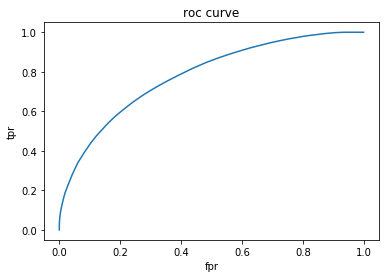

In [15]:
x = fpr 
y = tpr
plt.title("roc curve") 
plt.xlabel("fpr") 
plt.ylabel("tpr") 
plt.plot(x,y) 
plt.show()

In [16]:
treeclf.feature_importances_

array([7.12665196e-04, 6.08773979e-03, 8.19941977e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.18349252e-06,
       0.00000000e+00, 1.08159088e-06, 2.30726707e-04, 0.00000000e+00,
       0.00000000e+00, 6.90399722e-03, 1.24339986e-02, 5.45440088e-01,
       3.28341455e-01, 1.78458670e-02])

### 2.lightgbm模型  
默认参数

In [11]:
X = np.array(train_final.iloc[:,2:-1])
y = np.array(train_final.iloc[:,-1])

In [12]:
%%time
lgbm = LGBMClassifier(silent=False)
lgbm.fit(X,y)

Wall time: 1min 2s


In [13]:
y_pred = lgbm.predict(X)
y_proba = lgbm.predict_proba(X)

In [23]:
y_proba[:,1]

array([0.61523836, 0.99948388, 0.75715806, ..., 0.77813072, 0.57034259,
       0.66092279])

In [14]:
accuracy_score(y_pred,y)

0.7134505191054359

In [24]:
fpr,tpr,thresholds = metrics.roc_curve(y,y_proba[:,1])

In [25]:
metrics.auc(fpr, tpr)

0.7921882588995087

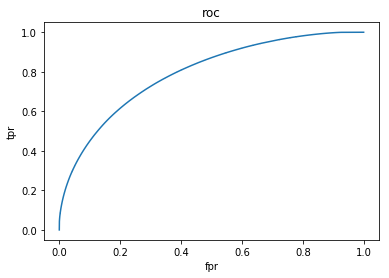

In [26]:
from matplotlib import pyplot as plt 
x = fpr 
y = tpr
plt.title("roc") 
plt.xlabel("fpr") 
plt.ylabel("tpr") 
plt.plot(x,y) 
plt.show()

In [33]:
lgbm.feature_importances_

array([134, 265, 315,  30,  75,   9,  32,  67,  16,  18,  76,  88,   1,
       339, 348, 464, 475, 248])

## 3.调参  
机器性能有限，只尝试用部分数据调参，请直接看第4模块

In [8]:
train_sample = train_final.sample(frac=0.1)

In [9]:
train_sample.shape

(737740, 21)

In [10]:
X = np.array(train_sample.iloc[:,2:-1])
y = np.array(train_sample.iloc[:,-1])

In [5]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=6)

### (1) n_estimators

In [6]:
def get_n_estimators(params,X,y): 
    train_set = lightgbm.Dataset(X,y)
    cv_result = lightgbm.cv(params,train_set,num_boost_round=1000,nfold=3,\
                        metrics='auc',early_stopping_rounds=10,seed=6)
     
    print('best n_estimators:' , len(cv_result['auc-mean']))
    print('best cv score:' , cv_result['auc-mean'][-1])
     
    return cv_result

In [7]:
%%time
params = {'boosting_type': 'gbdt',
          'n_jobs': 4,
          'objective': 'binary',
          'learning_rate': 0.1,
          'max_depth': 10,
          'num_leaves': 80,
          'max_bin': 127,
          'subsample': 0.8,
          'bagging_freq': 1,
          'colsample_bytree': 0.7,
         }

cv_result = get_n_estimators(params,X,y)

best n_estimators: 1000
best cv score: 0.8077677933485231
Wall time: 26min 19s


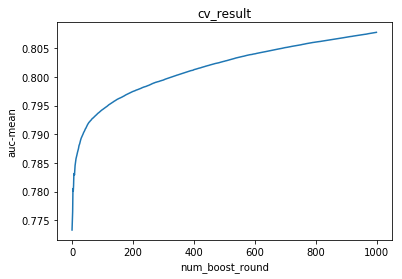

In [9]:
x = np.arange(1000) 
y = cv_result["auc-mean"]
plt.title("cv_result") 
plt.xlabel("num_boost_round") 
plt.ylabel("auc-mean") 
plt.plot(x,y) 
plt.show()

### (2) num_leaves & max_depth=7

Found input variables with inconsistent numbers of samples

In [11]:
%%time
params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          'n_jobs': 4,
          'learning_rate': 0.1,
          'n_estimators':300,
          'max_depth': 9,
          'max_bin': 127,
          'subsample': 0.7,
          'bagging_freq': 1,
          'colsample_bytree': 0.7,
         }
lgbm = LGBMClassifier(silent=False,**params)

num_leaves = range(70,80,10)
tuned_params = dict( num_leaves = num_leaves)

gridcv = GridSearchCV(lgbm, n_jobs=4, param_grid=tuned_params,\
                           cv = kfold, scoring="roc_auc", verbose=5, refit = False)
gridcv.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Wall time: 37.1 s


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:   36.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:   36.7s finished


In [12]:
print(gridcv.best_score_)

0.7937268175455278


In [13]:
print(gridcv.best_params_)

{'num_leaves': 70}


### 4. 最终模型

In [30]:
X = np.array(train_final.iloc[:,2:-1])
y = np.array(train_final.iloc[:,-1])

设置参数

In [31]:
params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          'n_jobs': 4,
          'learning_rate': 0.05,
          'n_estimators':500,
          'max_depth': 8,
          'num_leaves': 80,
          'max_bin': 127,
          'subsample': 0.7,
          'bagging_freq': 3,
          'colsample_bytree': 1,
          'reg_alpha':1,
          'reg_lambda':1,
         }

#### 4.1 交叉验证

In [40]:
def validate():
    accuracys = []
    aucs = []
    fprs = []
    tprs = []
    iteration = 0
    kfold = KFold(n_splits=3)
    for train_index, val_index in kfold.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        lgbm_cv = LGBMClassifier(silent=False,**params)
        lgbm_cv.fit(X_train,y_train)
        y_pred = lgbm_cv.predict(X_val)
        y_proba = lgbm_cv.predict_proba(X_val)
        #计算accuracy
        accuracy = accuracy_score(y_pred,y_val)
        accuracys.append(accuracy)
        #计算auc
        fpr,tpr,thresholds = metrics.roc_curve(y_val,y_proba[:,1],pos_label=1)
        fprs.append(fpr)
        tprs.append(tpr)
        auc = metrics.auc(fpr, tpr)
        aucs.append(auc)
        print("iteration %d: accuracy %f, auc %f"%(iteration,accuracy,auc))
        iteration += 1
    avg_accuracy = round(sum(accuracys)/3,5)
    avg_auc = round(sum(aucs)/3,5)
    avg_fpr = list(map(lambda x: (x[0]+x[1]+x[2])/3,zip(fprs[0],fprs[1],fprs[2])))
    avg_tpr = list(map(lambda x: (x[0]+x[1]+x[2])/3,zip(tprs[0],tprs[1],tprs[2])))
    return avg_accuracy,avg_auc,avg_fpr,avg_tpr

平均auc和accuracy

In [41]:
%%time
avg_accuracy,avg_auc,avg_fpr,avg_tpr = validate()

iteration 0: accuracy 0.735106, auc 0.821309
iteration 1: accuracy 0.700678, auc 0.776844
iteration 2: accuracy 0.681979, auc 0.752568
Wall time: 13min 13s


In [43]:
avg_accuracy,avg_auc

(0.70592, 0.78357)

roc curve

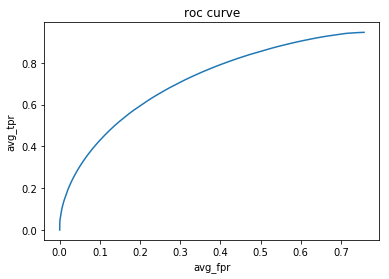

In [44]:
plt.title("roc curve") 
plt.xlabel("avg_fpr") 
plt.ylabel("avg_tpr") 
plt.plot(avg_fpr,avg_tpr) 
plt.show()

#### 4.2 训练  
全部训练数据

In [32]:
%%time
lgbm = LGBMClassifier(**params,silent=False,random_state=6)
lgbm.fit(X,y)

Wall time: 4min 40s


roc curve

In [33]:
y_proba = lgbm.predict_proba(X)

In [34]:
fpr,tpr,thresholds = metrics.roc_curve(y,y_proba[:,1])

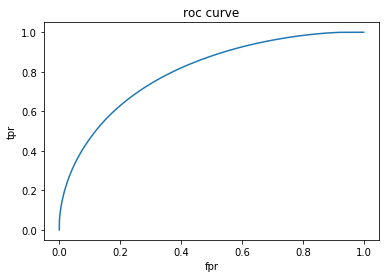

In [35]:
plt.title("roc curve") 
plt.xlabel("fpr") 
plt.ylabel("tpr") 
plt.plot(fpr,tpr) 
plt.show()

auc

In [36]:
metrics.auc(fpr, tpr)

0.7994955130019205

In [37]:
roc_auc_score(y,y_proba[:,1])

0.7994955130019205

accuracy

In [38]:
y_pred = lgbm.predict(X)

In [39]:
accuracy_score(y_pred,y)

0.7200231572004403

#### 4.3 保存模型

In [45]:
pickle.dump(lgbm,open("./model/lgbm.pkl","wb"))

### 遇到的坑

lgbm模型是否可以把数据分批送进去训练，如何计算最优划分点呢？  
不可以

注意计算auc需要输出概率！predict_proba

ValueError: bad input shape (2459135, 2)  
y_proba是两列，分别是预测为0和1的概率

TypeError: 'numpy.float64' object is not iterable  
accuracys写成accuracy，aucs写成auc

ValueError: continuous format is not supported  
y必须为数值型变量，作roc曲线时把tpr赋值给y了。